# KNN Classifier using Wi-Fi and Bluetooth data

### Experiments which aims to explore the ML algorithm K-Nearest Neighbors as a Classifier algorithm using the Wi-Fi and BLE technologies moreover using the strength of the signal as a basis.

## Imports
Imports of the libraries to be used throughout the experiments

In [1]:
#CSV Related
import pandas as pd
import csv

# Machine Learning
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.pipeline import make_pipeline
import sklearn
import scipy

#Graphical Display
%matplotlib inline
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style("whitegrid")
sns.despine()
from pandas.plotting import scatter_matrix

plt.style.use('seaborn-whitegrid')

#Additional Helper Libraries
from operator import itemgetter
import re

<Figure size 432x288 with 0 Axes>

### Load File
Function that allows to load a file from disk

In [2]:
#Function that reads a csv file and structures the data accordingly
def load_file(filename):
    dataset = pd.read_csv(filename)
    return dataset

### Replace 0 with Nan RSSI Values

In [3]:
def replace_features_nan(dataset):
    dataset.iloc[:,4:] = dataset.iloc[:,4:].replace(0,np.nan)
    return dataset

### Initialize Dataset

In [4]:
dataset = load_file('../radiomapBluetoothWiFiclassifier_university_dataset.csv')
dataset = replace_features_nan(dataset)
display(dataset)
display(dataset.shape)

,Fingerprint ID,coordinate_X,coordinate_Y,zone,f0:5c:19:94:1a:40,f0:5c:19:94:1a:41,f0:5c:19:94:1a:42,34:fc:b9:18:e4:c1,34:fc:b9:18:e4:c0,34:fc:b9:18:e4:c2,...,10:7b:44:eb:73:98,f0:5c:19:94:19:f2,f0:5c:19:94:19:f0,34:fc:b9:18:e7:21,34:fc:b9:18:e7:22,34:fc:b9:18:e7:20,f0:5c:19:94:19:f1,E1:E9:C3:D9:09:C3,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3
0,265,1.0,3.0,Personal,-62.0,-65.0,-63.0,-76.0,-78.0,-79.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-86.0,-88.0,-96
1,266,1.0,3.0,Personal,-62.0,-61.0,-62.0,-77.0,-78.0,-78.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-96.0,-88.0,-96
2,267,1.0,3.0,Personal,-63.0,-62.0,-62.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-94.0,-92.0,-98
3,268,1.0,3.0,Personal,-63.0,-61.0,-63.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-92.0,-89.0,-96
4,269,1.0,3.0,Personal,-63.0,-61.0,-63.0,-76.0,-78.0,-78.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-96.0,-89.0,-93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,1022,2.0,3.0,Personal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-90.0,-89.0,NaN,NaN,NaN,-90.0,-95.0,-84.0,-95
746,1023,2.0,3.0,Personal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-88.0,NaN,NaN,NaN,NaN,-90.0,-94.0,-83.0,-92
747,1024,2.0,3.0,Personal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-89.0,-90.0,NaN,NaN,NaN,-90.0,-92.0,-84.0,-91
748,1025,2.0,3.0,Personal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-91.0,-89.0,NaN,NaN,NaN,NaN,-93.0,-84.0,-93


(750, 37)

### Dataset Overall Info

In [5]:
display(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fingerprint ID     750 non-null    int64  
 1   coordinate_X       750 non-null    float64
 2   coordinate_Y       750 non-null    float64
 3   zone               750 non-null    object 
 4   f0:5c:19:94:1a:40  630 non-null    float64
 5   f0:5c:19:94:1a:41  634 non-null    float64
 6   f0:5c:19:94:1a:42  635 non-null    float64
 7   34:fc:b9:18:e4:c1  189 non-null    float64
 8   34:fc:b9:18:e4:c0  145 non-null    float64
 9   34:fc:b9:18:e4:c2  178 non-null    float64
 10  f0:5c:19:94:1a:50  664 non-null    float64
 11  f0:5c:19:94:1a:51  699 non-null    float64
 12  f0:5c:19:94:1a:52  738 non-null    float64
 13  4c:ed:fb:5a:5c:0c  712 non-null    float64
 14  4c:ed:fb:5a:5c:08  682 non-null    float64
 15  f0:5c:19:94:19:e1  343 non-null    float64
 16  f0:5c:19:94:19:e2  280 non

None

### File Overall Description
Usage of describe pandas function on the dataset

In [6]:
display(dataset.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
Fingerprint ID,750.0,639.980000,217.460567,265.0,452.25,639.5,826.75,1026.0
coordinate_X,750.0,0.000000,1.415157,-2.0,-1.00,0.0,1.00,2.0
coordinate_Y,750.0,1.000000,1.415157,-1.0,0.00,1.0,2.00,3.0
f0:5c:19:94:1a:40,630.0,-65.284127,3.983300,-76.0,-68.00,-65.0,-62.00,-56.0
f0:5c:19:94:1a:41,634.0,-63.529968,3.464086,-71.0,-66.00,-64.0,-62.00,-48.0
f0:5c:19:94:1a:42,635.0,-64.628346,3.965205,-76.0,-68.00,-64.0,-61.00,-56.0
34:fc:b9:18:e4:c1,189.0,-78.380952,3.702049,-86.0,-81.00,-78.0,-76.00,-70.0
34:fc:b9:18:e4:c0,145.0,-80.255172,4.808527,-92.0,-84.00,-79.0,-77.00,-71.0
34:fc:b9:18:e4:c2,178.0,-81.410112,4.828740,-92.0,-86.00,-81.0,-78.00,-70.0
f0:5c:19:94:1a:50,664.0,-78.664157,3.975435,-89.0,-81.25,-79.0,-76.00,-69.0


### % of Missing Values

In [7]:
def compute_missing_values(dataset): 
    missing_values = dataset.isnull().sum()
    missing_dataset = pd.DataFrame(missing_values,columns=['Missing Values'])
    display(missing_dataset)

In [8]:
compute_missing_values(dataset)

,Missing Values
Fingerprint ID,0
coordinate_X,0
coordinate_Y,0
zone,0
f0:5c:19:94:1a:40,120
f0:5c:19:94:1a:41,116
f0:5c:19:94:1a:42,115
34:fc:b9:18:e4:c1,561
34:fc:b9:18:e4:c0,605
34:fc:b9:18:e4:c2,572


### Overall Histogram of dataset atributes

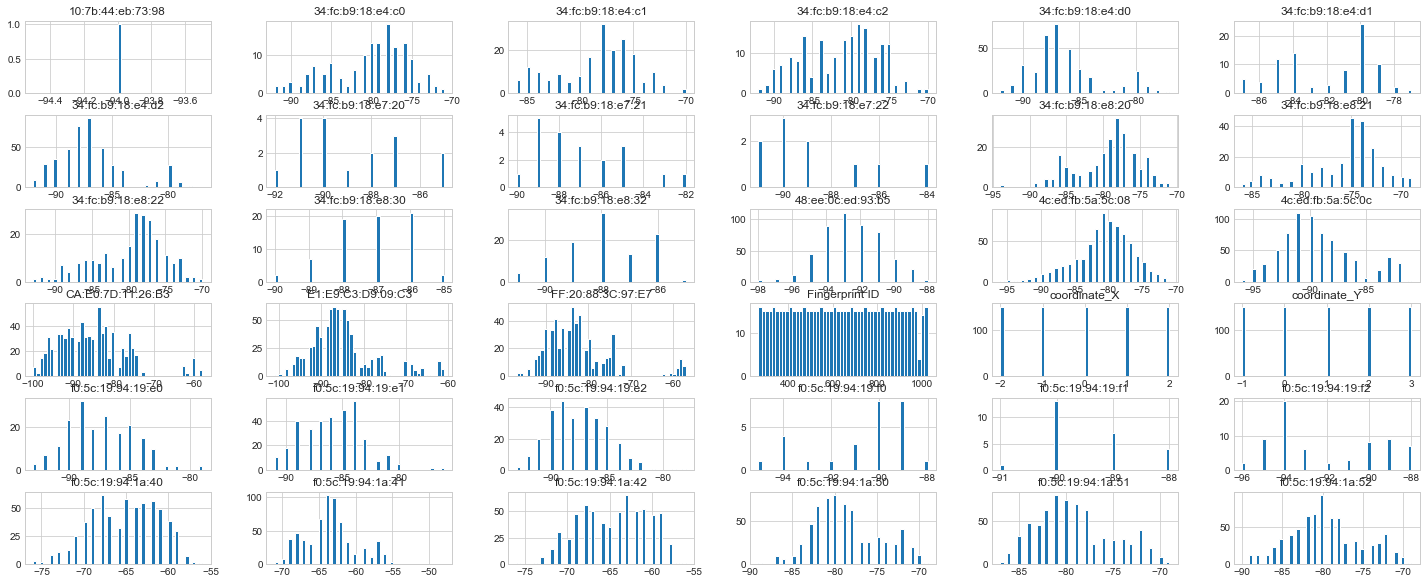

In [9]:
dataset.hist(bins=50,figsize=(25,10))
plt.show()

### Target Attribute - Zone
Graphical display of the zones scanned in the experiment

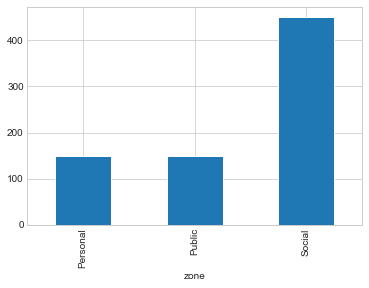

In [10]:
reference_points = dataset.groupby(['zone'])
reference_points.size().plot(kind="bar")

### Access Points Graphical Display

<BarContainer object of 30 artists>

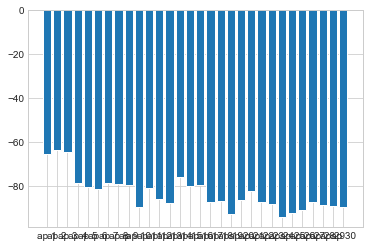

In [11]:
count_aps = {}
counter = 1
first_beacon_index = -1
for ap in dataset.iloc[:,4:]:
    if ap.islower() == False:
        first_beacon_index = list(dataset.iloc[:,4:]).index(ap)
        break
    mean_value = dataset[ap].mean()
    count_aps['ap ' + str(counter)] = mean_value
    counter = counter + 1
plt.bar(range(len(count_aps)),list(count_aps.values()),align='center',tick_label=list(count_aps.keys()))

### Beacons Graphical Display
Graphical display with the average strength signal transmitted by each beacon

<BarContainer object of 3 artists>

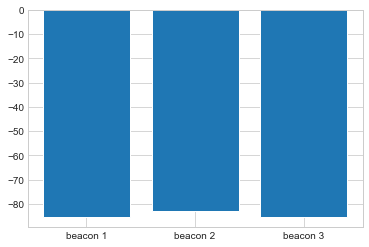

In [12]:
count_beacons = {}
counter = 1
beacons = dataset.iloc[:,4:].iloc[:,first_beacon_index:]
for beacon in beacons:
    mean_value = dataset[beacon].mean()
    count_beacons['beacon ' + str(counter)] = mean_value
    counter = counter + 1
plt.bar(range(len(count_beacons)),list(count_beacons.values()),align='center',tick_label=list(count_beacons.keys()))

## Signal Strength Distribution Display
Graphical display of the distribution of the signal strength

### Wifi Signal Strength

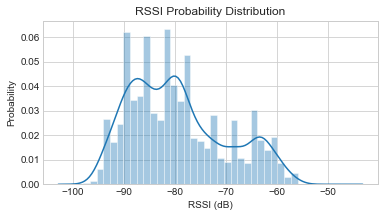

In [13]:
plt.figure(figsize=(6,3))
# Title
plt.title('RSSI Probability Distribution')

sns.distplot(dataset.iloc[:,4:].iloc[:,:first_beacon_index])
# The X Label
plt.xlabel('RSSI (dB)')
# The Y Label
plt.ylabel('Probability')
# Show the plot
plt.show()

### Bluetooth Signal Strength

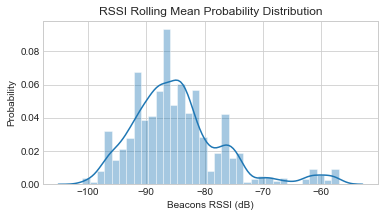

In [14]:
plt.figure(figsize=(6,3))
# Title
plt.title('RSSI Rolling Mean Probability Distribution')
# The KDE plot for the Rolling Mean column
sns.distplot(dataset.iloc[:,4:].iloc[:,first_beacon_index:])
# The X Label
plt.xlabel('Beacons RSSI (dB)')
# The Y Label
plt.ylabel('Probability')
# Show the plot
plt.show()

### Correlations
Check how much each attribute collerates with each other. Values range from -1 to 1. Close to 1 means a strong positive correlation.

In [15]:
def compute_correlations(dataset):
    corr_matrix = dataset.corr()
    display(corr_matrix)

In [16]:
compute_correlations(dataset)

,Fingerprint ID,coordinate_X,coordinate_Y,f0:5c:19:94:1a:40,f0:5c:19:94:1a:41,f0:5c:19:94:1a:42,34:fc:b9:18:e4:c1,34:fc:b9:18:e4:c0,34:fc:b9:18:e4:c2,f0:5c:19:94:1a:50,...,10:7b:44:eb:73:98,f0:5c:19:94:19:f2,f0:5c:19:94:19:f0,34:fc:b9:18:e7:21,34:fc:b9:18:e7:22,34:fc:b9:18:e7:20,f0:5c:19:94:19:f1,E1:E9:C3:D9:09:C3,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3
Fingerprint ID,1.000000,0.366251,-0.566946,0.032462,0.242338,0.033822,-0.139389,-0.117810,-0.001366,0.508888,...,NaN,0.748611,0.837234,-0.071316,-0.227020,-0.675707,-0.133456,0.109751,-0.202906,0.301147
coordinate_X,0.366251,1.000000,0.000000,0.280135,0.416280,0.287384,0.064912,0.171978,0.200114,0.225635,...,NaN,NaN,NaN,-0.623570,-0.854697,-0.919701,NaN,-0.558757,-0.413933,0.148591
coordinate_Y,-0.566946,0.000000,1.000000,0.053322,-0.071948,0.053766,0.137335,0.016277,-0.044580,-0.062025,...,NaN,0.832861,0.857329,-0.333712,-0.592749,-0.812240,NaN,-0.425166,0.318924,-0.666386
f0:5c:19:94:1a:40,0.032462,0.280135,0.053322,1.000000,0.588375,0.899034,-0.118245,-0.239832,-0.170579,0.047614,...,NaN,0.161779,0.918629,-0.361584,-0.784437,-0.523133,NaN,-0.218615,-0.134458,-0.090940
f0:5c:19:94:1a:41,0.242338,0.416280,-0.071948,0.588375,1.000000,0.617635,0.056372,-0.085792,0.000745,0.185243,...,NaN,0.344661,0.904578,-0.104510,-0.562859,-0.598961,NaN,-0.189281,-0.264925,0.156153
f0:5c:19:94:1a:42,0.033822,0.287384,0.053766,0.899034,0.617635,1.000000,-0.096208,-0.213136,-0.180547,0.080835,...,NaN,0.110221,0.866643,-0.401765,-0.649519,-0.564232,NaN,-0.213185,-0.146619,-0.086660
34:fc:b9:18:e4:c1,-0.139389,0.064912,0.137335,-0.118245,0.056372,-0.096208,1.000000,0.879276,0.859055,0.431713,...,NaN,-0.130152,0.500000,-0.693375,-0.693375,-0.993399,NaN,-0.286732,0.063276,0.238843
34:fc:b9:18:e4:c0,-0.117810,0.171978,0.016277,-0.239832,-0.085792,-0.213136,0.879276,1.000000,0.966363,0.263773,...,NaN,-0.484034,0.000000,NaN,NaN,-1.000000,-1.000000,-0.248865,-0.227294,0.249093
34:fc:b9:18:e4:c2,-0.001366,0.200114,-0.044580,-0.170579,0.000745,-0.180547,0.859055,0.966363,1.000000,0.353474,...,NaN,-0.348230,0.277350,NaN,NaN,-1.000000,NaN,-0.217113,-0.131575,0.310376
f0:5c:19:94:1a:50,0.508888,0.225635,-0.062025,0.047614,0.185243,0.080835,0.431713,0.263773,0.353474,1.000000,...,NaN,0.676457,0.766638,-0.859702,-0.795020,-0.881834,0.150109,-0.088686,-0.222276,-0.053498


### Data cleaning
Fill in missing values and fix/remove outliers

In [17]:
def compute_data_cleaning(dataset,feature):
    nan_filler = dataset[feature].min()*1.010
    dataset[feature] = dataset[feature].fillna(nan_filler) # Fill missing values

In [18]:
for x in dataset.iloc[:,4:]:
    display(x)
    compute_data_cleaning(dataset,x)
display(dataset)

'f0:5c:19:94:1a:40'

'f0:5c:19:94:1a:41'

'f0:5c:19:94:1a:42'

'34:fc:b9:18:e4:c1'

'34:fc:b9:18:e4:c0'

'34:fc:b9:18:e4:c2'

'f0:5c:19:94:1a:50'

'f0:5c:19:94:1a:51'

'f0:5c:19:94:1a:52'

'4c:ed:fb:5a:5c:0c'

'4c:ed:fb:5a:5c:08'

'f0:5c:19:94:19:e1'

'f0:5c:19:94:19:e2'

'34:fc:b9:18:e8:21'

'34:fc:b9:18:e8:22'

'34:fc:b9:18:e8:20'

'f0:5c:19:94:19:e0'

'34:fc:b9:18:e4:d2'

'48:ee:0c:ed:93:b5'

'34:fc:b9:18:e4:d0'

'34:fc:b9:18:e4:d1'

'34:fc:b9:18:e8:30'

'34:fc:b9:18:e8:32'

'10:7b:44:eb:73:98'

'f0:5c:19:94:19:f2'

'f0:5c:19:94:19:f0'

'34:fc:b9:18:e7:21'

'34:fc:b9:18:e7:22'

'34:fc:b9:18:e7:20'

'f0:5c:19:94:19:f1'

'E1:E9:C3:D9:09:C3'

'FF:20:88:3C:97:E7'

'CA:E0:7D:11:26:B3'

,Fingerprint ID,coordinate_X,coordinate_Y,zone,f0:5c:19:94:1a:40,f0:5c:19:94:1a:41,f0:5c:19:94:1a:42,34:fc:b9:18:e4:c1,34:fc:b9:18:e4:c0,34:fc:b9:18:e4:c2,...,10:7b:44:eb:73:98,f0:5c:19:94:19:f2,f0:5c:19:94:19:f0,34:fc:b9:18:e7:21,34:fc:b9:18:e7:22,34:fc:b9:18:e7:20,f0:5c:19:94:19:f1,E1:E9:C3:D9:09:C3,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3
0,265,1.0,3.0,Personal,-62.00,-65.00,-63.00,-76.00,-78.00,-79.00,...,-94.94,-96.96,-95.95,-90.9,-91.91,-92.92,-91.91,-86.0,-88.0,-96
1,266,1.0,3.0,Personal,-62.00,-61.00,-62.00,-77.00,-78.00,-78.00,...,-94.94,-96.96,-95.95,-90.9,-91.91,-92.92,-91.91,-96.0,-88.0,-96
2,267,1.0,3.0,Personal,-63.00,-62.00,-62.00,-86.86,-92.92,-92.92,...,-94.94,-96.96,-95.95,-90.9,-91.91,-92.92,-91.91,-94.0,-92.0,-98
3,268,1.0,3.0,Personal,-63.00,-61.00,-63.00,-86.86,-92.92,-92.92,...,-94.94,-96.96,-95.95,-90.9,-91.91,-92.92,-91.91,-92.0,-89.0,-96
4,269,1.0,3.0,Personal,-63.00,-61.00,-63.00,-76.00,-78.00,-78.00,...,-94.94,-96.96,-95.95,-90.9,-91.91,-92.92,-91.91,-96.0,-89.0,-93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,1022,2.0,3.0,Personal,-76.76,-71.71,-76.76,-86.86,-92.92,-92.92,...,-94.94,-90.00,-89.00,-90.9,-91.91,-92.92,-90.00,-95.0,-84.0,-95
746,1023,2.0,3.0,Personal,-76.76,-71.71,-76.76,-86.86,-92.92,-92.92,...,-94.94,-88.00,-95.95,-90.9,-91.91,-92.92,-90.00,-94.0,-83.0,-92
747,1024,2.0,3.0,Personal,-76.76,-71.71,-76.76,-86.86,-92.92,-92.92,...,-94.94,-89.00,-90.00,-90.9,-91.91,-92.92,-90.00,-92.0,-84.0,-91
748,1025,2.0,3.0,Personal,-76.76,-71.71,-76.76,-86.86,-92.92,-92.92,...,-94.94,-91.00,-89.00,-90.9,-91.91,-92.92,-91.91,-93.0,-84.0,-93


### Initialize Training Data
Training Data intialization for predictions purposes

In [78]:
train_wifi = dataset.iloc[:,4:first_beacon_index]
display(train_wifi)
display(train_wifi.shape)

,f0:5c:19:94:1a:40,f0:5c:19:94:1a:41,f0:5c:19:94:1a:42,34:fc:b9:18:e4:c1,34:fc:b9:18:e4:c0,34:fc:b9:18:e4:c2,f0:5c:19:94:1a:50,f0:5c:19:94:1a:51,f0:5c:19:94:1a:52,4c:ed:fb:5a:5c:0c,...,f0:5c:19:94:19:e0,34:fc:b9:18:e4:d2,48:ee:0c:ed:93:b5,34:fc:b9:18:e4:d0,34:fc:b9:18:e4:d1,34:fc:b9:18:e8:30,34:fc:b9:18:e8:32,10:7b:44:eb:73:98,f0:5c:19:94:19:f2,f0:5c:19:94:19:f0
0,-62.00,-65.00,-63.00,-76.00,-78.00,-79.00,-80.0,-80.0,-80.0,-89.0,...,-93.93,-92.92,-98.98,-92.92,-87.87,-90.9,-91.91,-94.94,-96.96,-95.95
1,-62.00,-61.00,-62.00,-77.00,-78.00,-78.00,-80.0,-81.0,-80.0,-90.0,...,-93.93,-92.92,-98.98,-92.92,-87.87,-90.9,-91.91,-94.94,-96.96,-95.95
2,-63.00,-62.00,-62.00,-86.86,-92.92,-92.92,-80.0,-79.0,-80.0,-90.0,...,-87.00,-92.92,-98.98,-92.92,-87.87,-90.9,-91.91,-94.94,-96.96,-95.95
3,-63.00,-61.00,-63.00,-86.86,-92.92,-92.92,-81.0,-81.0,-81.0,-90.0,...,-93.93,-92.92,-98.98,-92.92,-87.87,-90.9,-91.91,-94.94,-96.96,-95.95
4,-63.00,-61.00,-63.00,-76.00,-78.00,-78.00,-80.0,-80.0,-81.0,-90.0,...,-88.00,-92.92,-98.98,-92.92,-87.87,-90.9,-91.91,-94.94,-96.96,-95.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,-76.76,-71.71,-76.76,-86.86,-92.92,-92.92,-71.0,-73.0,-73.0,-83.0,...,-93.93,-86.00,-98.98,-86.00,-87.87,-90.9,-91.91,-94.94,-90.00,-89.00
746,-76.76,-71.71,-76.76,-86.86,-92.92,-92.92,-72.0,-74.0,-73.0,-83.0,...,-93.93,-86.00,-92.00,-86.00,-86.00,-90.9,-91.91,-94.94,-88.00,-95.95
747,-76.76,-71.71,-76.76,-86.86,-92.92,-92.92,-72.0,-73.0,-73.0,-83.0,...,-93.93,-87.00,-93.00,-88.00,-87.87,-90.9,-91.91,-94.94,-89.00,-90.00
748,-76.76,-71.71,-76.76,-86.86,-92.92,-92.92,-74.0,-72.0,-73.0,-83.0,...,-93.93,-85.00,-92.00,-86.00,-85.00,-90.9,-91.91,-94.94,-91.00,-89.00


(750, 26)

In [80]:
train_ble = dataset.iloc[:,4:].iloc[:,first_beacon_index:]
display(train_ble)
display(train_ble.shape)

,E1:E9:C3:D9:09:C3,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3,labels
0,-86.0,-88.0,-96,0
1,-96.0,-88.0,-96,0
2,-94.0,-92.0,-98,0
3,-92.0,-89.0,-96,0
4,-96.0,-89.0,-93,0
...,...,...,...,...
745,-95.0,-84.0,-95,0
746,-94.0,-83.0,-92,0
747,-92.0,-84.0,-91,0
748,-93.0,-84.0,-93,0


(750, 4)

In [81]:
X_train = dataset.iloc[:,4:]
display(X_train)
display(X_train.shape)

,f0:5c:19:94:1a:40,f0:5c:19:94:1a:41,f0:5c:19:94:1a:42,34:fc:b9:18:e4:c1,34:fc:b9:18:e4:c0,34:fc:b9:18:e4:c2,f0:5c:19:94:1a:50,f0:5c:19:94:1a:51,f0:5c:19:94:1a:52,4c:ed:fb:5a:5c:0c,...,f0:5c:19:94:19:f2,f0:5c:19:94:19:f0,34:fc:b9:18:e7:21,34:fc:b9:18:e7:22,34:fc:b9:18:e7:20,f0:5c:19:94:19:f1,E1:E9:C3:D9:09:C3,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3,labels
0,-62.00,-65.00,-63.00,-76.00,-78.00,-79.00,-80.0,-80.0,-80.0,-89.0,...,-96.96,-95.95,-90.9,-91.91,-92.92,-91.91,-86.0,-88.0,-96,0
1,-62.00,-61.00,-62.00,-77.00,-78.00,-78.00,-80.0,-81.0,-80.0,-90.0,...,-96.96,-95.95,-90.9,-91.91,-92.92,-91.91,-96.0,-88.0,-96,0
2,-63.00,-62.00,-62.00,-86.86,-92.92,-92.92,-80.0,-79.0,-80.0,-90.0,...,-96.96,-95.95,-90.9,-91.91,-92.92,-91.91,-94.0,-92.0,-98,0
3,-63.00,-61.00,-63.00,-86.86,-92.92,-92.92,-81.0,-81.0,-81.0,-90.0,...,-96.96,-95.95,-90.9,-91.91,-92.92,-91.91,-92.0,-89.0,-96,0
4,-63.00,-61.00,-63.00,-76.00,-78.00,-78.00,-80.0,-80.0,-81.0,-90.0,...,-96.96,-95.95,-90.9,-91.91,-92.92,-91.91,-96.0,-89.0,-93,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,-76.76,-71.71,-76.76,-86.86,-92.92,-92.92,-71.0,-73.0,-73.0,-83.0,...,-90.00,-89.00,-90.9,-91.91,-92.92,-90.00,-95.0,-84.0,-95,0
746,-76.76,-71.71,-76.76,-86.86,-92.92,-92.92,-72.0,-74.0,-73.0,-83.0,...,-88.00,-95.95,-90.9,-91.91,-92.92,-90.00,-94.0,-83.0,-92,0
747,-76.76,-71.71,-76.76,-86.86,-92.92,-92.92,-72.0,-73.0,-73.0,-83.0,...,-89.00,-90.00,-90.9,-91.91,-92.92,-90.00,-92.0,-84.0,-91,0
748,-76.76,-71.71,-76.76,-86.86,-92.92,-92.92,-74.0,-72.0,-73.0,-83.0,...,-91.00,-89.00,-90.9,-91.91,-92.92,-91.91,-93.0,-84.0,-93,0


(750, 34)

### Dealing with Categorical Data
Using Hot-Encoder or Label Encoder to convert text/categorical data into numerical data. ML algorithms prefer it

In [20]:
label_encoder = LabelEncoder()
def compute_encoder(categorical_data,flag):
    if flag == 0:
        labels = label_encoder.fit_transform(categorical_data)
    else:
        labels = label_encoder.transform(categorical_data)
    return labels

In [21]:
categorical_zone = dataset[['zone']]
print("Previous Categorical Data")
display(categorical_zone)
zone_changed = compute_encoder(categorical_zone,0)
print("After One Hot Encoder")
dataset['labels'] = zone_changed
train_Y = dataset['labels'].values.reshape(-1,1)

Previous Categorical Data


,zone
0,Personal
1,Personal
2,Personal
3,Personal
4,Personal
...,...
745,Personal
746,Personal
747,Personal
748,Personal


After One Hot Encoder


D:\Programs\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Plot Training Data
Graphical Display of the observations in the dataset

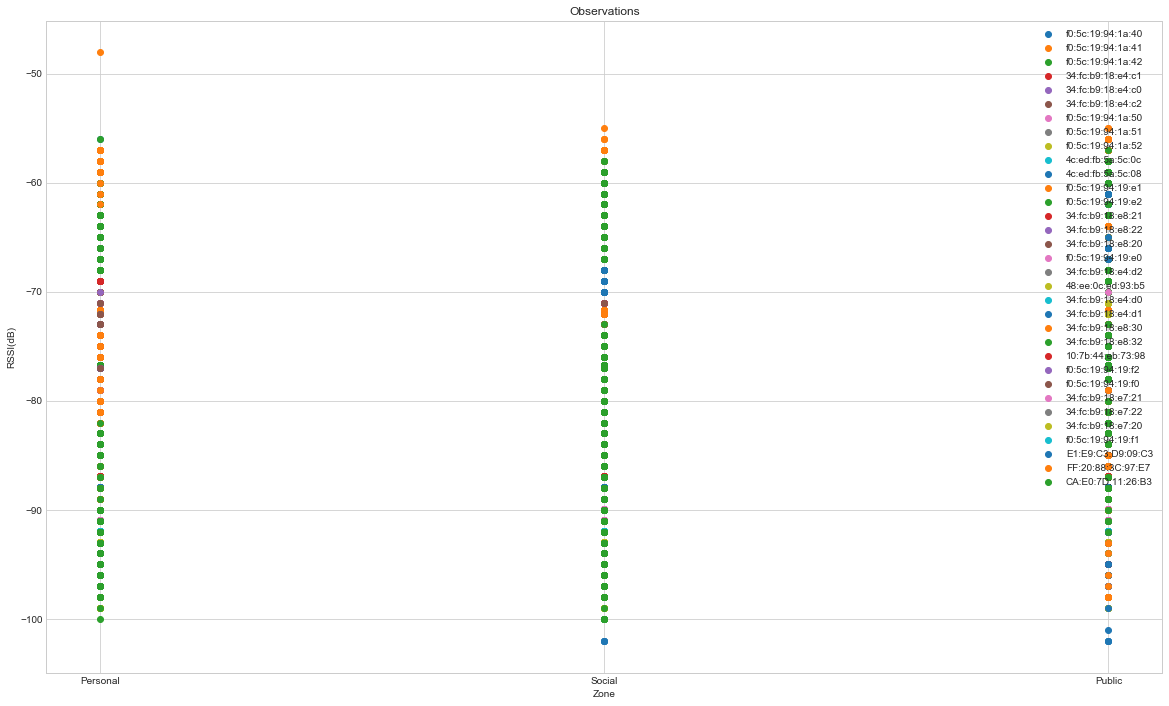

In [22]:
plt.figure(figsize=(20,12))
num = 0
palette = plt.get_cmap('Set1')
for x in X_train:
    num += 1
    plt.scatter(dataset['zone'],dataset[x],label=x,cmap='Sequential')
plt.title('Observations')
plt.xlabel('Zone')  
plt.ylabel('RSSI(dB)')  
plt.legend(loc='upper right');
plt.show()

### Initialize Hyperparameters for tunning

In [23]:
distance_metris = ["euclidean", "manhattan", "canberra", "braycurtis"]
algorithms = ["brute","kd_tree","ball_tree","auto"]
filters = ["Median","Mean","No Filter"]
scaler = [StandardScaler(),MinMaxScaler(),MaxAbsScaler(),None]
weights = ["uniform","distance"]
knn_basic = KNeighborsClassifier()
print("DEFAULT HYPERPARAMETERS")
default_params = knn_basic.get_params()
display(pd.DataFrame(default_params,index=[1]))

DEFAULT HYPERPARAMETERS


,algorithm,leaf_size,metric,metric_params,n_jobs,n_neighbors,p,weights
1,auto,30,minkowski,None,None,5,2,uniform


## Statistics Output Format
Structure of the statistical output of each call to the KNN Regression Function

In [24]:
def structure_data(data,precision,accuracy,f1score):
    mae = data['error'].abs().mean()
    mse = np.power(data['error'],2).mean()
    rsme = np.sqrt(mse)
    precision = precision
    accuracy = accuracy
    f1score = f1score
    statistical_results = [mae,mse,rsme,precision,accuracy,f1score]
    return statistical_results

### Feature Selection 
Check strength of features using ensemble algorithm Random Forest

Feature Selection Computation


array([0.03301124, 0.05081342, 0.04189376, 0.00640804, 0.00337289,
       0.00501943, 0.03857772, 0.04547684, 0.03537729, 0.10941716,
       0.02963563, 0.07276476, 0.0361631 , 0.00919866, 0.00680897,
       0.00536544, 0.01338724, 0.01745599, 0.02514346, 0.0253708 ,
       0.00716382, 0.02222599, 0.03304262, 0.        , 0.0336918 ,
       0.00637006, 0.00106742, 0.00048029, 0.00050908, 0.01494878,
       0.0724313 , 0.05165035, 0.14575663])

CA:E0:7D:11:26:B3    0.145757
4c:ed:fb:5a:5c:0c    0.109417
f0:5c:19:94:19:e1    0.072765
E1:E9:C3:D9:09:C3    0.072431
FF:20:88:3C:97:E7    0.051650
f0:5c:19:94:1a:41    0.050813
f0:5c:19:94:1a:51    0.045477
f0:5c:19:94:1a:42    0.041894
f0:5c:19:94:1a:50    0.038578
f0:5c:19:94:19:e2    0.036163
f0:5c:19:94:1a:52    0.035377
f0:5c:19:94:19:f2    0.033692
34:fc:b9:18:e8:32    0.033043
f0:5c:19:94:1a:40    0.033011
4c:ed:fb:5a:5c:08    0.029636
34:fc:b9:18:e4:d0    0.025371
48:ee:0c:ed:93:b5    0.025143
34:fc:b9:18:e8:30    0.022226
34:fc:b9:18:e4:d2    0.017456
f0:5c:19:94:19:f1    0.014949
f0:5c:19:94:19:e0    0.013387
34:fc:b9:18:e8:21    0.009199
34:fc:b9:18:e4:d1    0.007164
34:fc:b9:18:e8:22    0.006809
34:fc:b9:18:e4:c1    0.006408
f0:5c:19:94:19:f0    0.006370
34:fc:b9:18:e8:20    0.005365
34:fc:b9:18:e4:c2    0.005019
34:fc:b9:18:e4:c0    0.003373
34:fc:b9:18:e7:21    0.001067
34:fc:b9:18:e7:20    0.000509
34:fc:b9:18:e7:22    0.000480
10:7b:44:eb:73:98    0.000000
dtype: flo

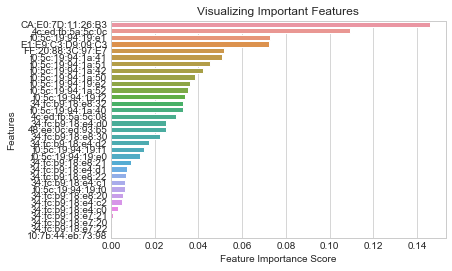

In [25]:
print("Feature Selection Computation")
random_forest_estimator = RandomForestClassifier()
main_estimator = make_pipeline(StandardScaler(),random_forest_estimator)
main_estimator.fit(X_train,train_Y.ravel())
display(random_forest_estimator.feature_importances_)
feature_imp = pd.Series(random_forest_estimator.feature_importances_,index=X_train.columns).sort_values(ascending=False)
display(feature_imp)
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

## Model Training and Evaluation - KNN Classification Model

In [60]:
def compute_KNN_with_Classifier(flag = 0,trainX_data = None,trainY_data = None,testX_data = None,testY_data = None,scaler = None,cross_validation = None,n_neighbors=4,
                                weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=-1):
    # Init the KNN Regressor Estimator
    knn_classifier_estimator = KNeighborsClassifier(n_neighbors,weights,algorithm,leaf_size,p,metric,metric_params,n_jobs)
    if scaler is not None:
        # Make pipeline using scaler transformation
        main_estimator = make_pipeline(scaler,knn_classifier_estimator)
    else:
        main_estimator = knn_classifier_estimator
    if cross_validation is None:
        # Fit the training data
        main_estimator.fit(trainX_data,trainY_data)
        # Predict the results of the testing data features
        predict_test = main_estimator.predict(testX_data)
        matrix = confusion_matrix(testY_data, predict_test)
        report = classification_report(testY_data, predict_test,output_dict=True)
        accuracy = accuracy_score(testY_data,predict_test)
    else:
        predict_test = cross_val_predict(main_estimator,testX_data,testY_data,cv = cross_validation)
        matrix = confusion_matrix(testY_data, predict_test)
        report = classification_report(testY_data, predict_test,output_dict=True)
        accuracy = accuracy_score(testY_data,predict_test)
    # Structure data to statistics
    statistical_array = list()
    statistics = pd.DataFrame(report).transpose()
    if flag == 2:
        display(testY_data)
        print("___")
        display(predict_test)
        error_dataframe = pd.DataFrame({'Actual': testY_data, 'Predicted':predict_test})
    else:
        error_dataframe = pd.DataFrame({'Actual': testY_data.flatten(), 'Predicted':predict_test.flatten()})
    if flag == 1:
        print("Confusion Matrix:")
        print(matrix)
        display(statistics)
        display(error_dataframe)
        error_dataframe.apply(pd.value_counts).plot(kind='bar', subplots=True)
    error = pd.DataFrame(np.where(error_dataframe['Actual'] != error_dataframe['Predicted'],1,0), columns=["error"])
    result = pd.DataFrame(train_Y,columns=["zone"]).join(error)
    return structure_data(result,statistics['precision'].mean(),accuracy,statistics['f1-score'].mean())

## Experiments

### Check Training model with no cross validation
Use KNN Classifier to check the results on the training data alone

Confusion Matrix:
[[142   0   8]
 [  2 142   6]
 [ 15   6 429]]


,precision,recall,f1-score,support
0,0.893082,0.946667,0.919094,150.000000
1,0.959459,0.946667,0.953020,150.000000
2,0.968397,0.953333,0.960806,450.000000
accuracy,0.950667,0.950667,0.950667,0.950667
macro avg,0.940313,0.948889,0.944307,750.000000
weighted avg,0.951547,0.950667,0.950907,750.000000


,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
745,0,0
746,0,0
747,0,0
748,0,0


Confusion Matrix:
[[150   0   0]
 [  0 150   0]
 [  0   1 449]]


,precision,recall,f1-score,support
0,1.000000,1.000000,1.000000,150.000000
1,0.993377,1.000000,0.996678,150.000000
2,1.000000,0.997778,0.998888,450.000000
accuracy,0.998667,0.998667,0.998667,0.998667
macro avg,0.997792,0.999259,0.998522,750.000000
weighted avg,0.998675,0.998667,0.998668,750.000000


,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
745,0,0
746,0,0
747,0,0
748,0,0


Confusion Matrix:
[[149   0   1]
 [  0 147   3]
 [  0   3 447]]


,precision,recall,f1-score,support
0,1.000000,0.993333,0.996656,150.000000
1,0.980000,0.980000,0.980000,150.000000
2,0.991131,0.993333,0.992231,450.000000
accuracy,0.990667,0.990667,0.990667,0.990667
macro avg,0.990377,0.988889,0.989629,750.000000
weighted avg,0.990678,0.990667,0.990670,750.000000


,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
745,0,0
746,0,0
747,0,0
748,0,0


,mae,mse,rmse,precision,accuracy,f1-score,type
2,0.001333,0.001333,0.036515,0.998085,0.998667,0.998570,BLE
5,0.001333,0.001333,0.036515,0.998085,0.998667,0.998570,BLE
3,0.009333,0.009333,0.096609,0.990475,0.990667,0.989975,Both
6,0.009333,0.009333,0.096609,0.990475,0.990667,0.989975,Both
0,0.026667,0.026667,0.163299,0.970062,0.973333,0.971455,None
1,0.049333,0.049333,0.222111,0.943911,0.950667,0.946467,WiFi
4,0.049333,0.049333,0.222111,0.943911,0.950667,0.946467,WiFi


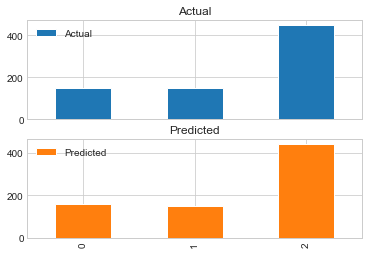

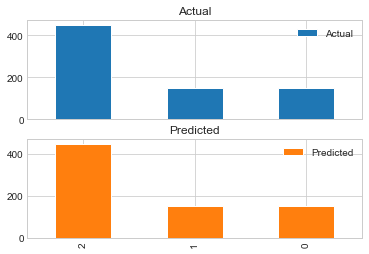

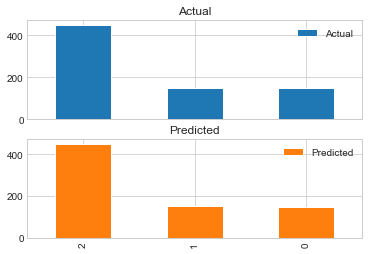

In [83]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','type']
types = ['WiFi','BLE','Both']
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    result = compute_KNN_with_Classifier(flag=1,trainX_data=trainX_data,trainY_data=train_Y.ravel(),
                                   testX_data=trainX_data,testY_data=train_Y.ravel(),
                                   scaler=StandardScaler())
    result.append(feature)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))

### Experiment - KNN with StratifiedKFold
Experiment using cross validation approach of StratifiedKFold

,mae,mse,rmse,precision,accuracy,f1-score,folds,type
13,0.001333,0.001333,0.036515,0.998085,0.998667,0.998570,6,BLE
17,0.001333,0.001333,0.036515,0.998085,0.998667,0.998570,10,BLE
16,0.001333,0.001333,0.036515,0.998085,0.998667,0.998570,9,BLE
15,0.001333,0.001333,0.036515,0.998085,0.998667,0.998570,8,BLE
14,0.001333,0.001333,0.036515,0.998085,0.998667,0.998570,7,BLE
11,0.041333,0.041333,0.203306,0.970818,0.958667,0.953126,4,BLE
12,0.046667,0.046667,0.216025,0.967356,0.953333,0.946635,5,BLE
23,0.052000,0.052000,0.228035,0.939810,0.948000,0.944655,7,Both
26,0.053333,0.053333,0.230940,0.937175,0.946667,0.943304,10,Both
24,0.053333,0.053333,0.230940,0.937495,0.946667,0.943110,8,Both


Number of Folds:  6


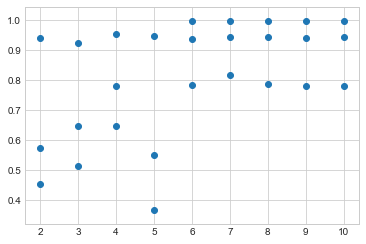

In [85]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','folds','type']
types = ['WiFi','BLE','Both']
cross_validation_list = np.arange(2,11)
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train
    for cv in cross_validation_list:
        result = compute_KNN_with_Classifier(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),cross_validation = cv)  
        result.append(cv)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.scatter(statistics['folds'],statistics['f1-score'])
selected_fold = statistics.sort_values(by=['f1-score'],ascending=False)['folds'].head(1).values[0]
print("Number of Folds: ",selected_fold)

### Experiment - KNN with HoldOut
Experiment using cross validation approach of HoldOut (Train test split)

,mae,mse,rmse,precision,accuracy,f1-score,test_size,type
9,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.1,BLE
11,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.3,BLE
10,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.2,BLE
16,0.001667,0.001667,0.040825,0.998830,0.998333,0.998206,0.8,BLE
15,0.001905,0.001905,0.043644,0.997272,0.998095,0.997959,0.7,BLE
14,0.002222,0.002222,0.047140,0.996821,0.997778,0.997620,0.6,BLE
13,0.002667,0.002667,0.051640,0.996193,0.997333,0.997145,0.5,BLE
12,0.003333,0.003333,0.057735,0.995255,0.996667,0.996435,0.4,BLE
17,0.008889,0.008889,0.094281,0.992629,0.991111,0.990379,0.9,BLE
18,0.026667,0.026667,0.163299,0.972423,0.973333,0.971339,0.1,Both


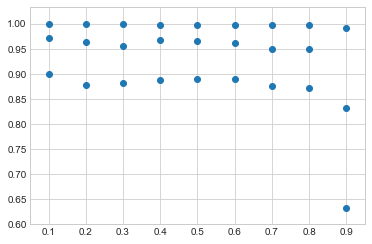

In [86]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','test_size','type']
test_sizes =[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
results = list()
types = ['WiFi','BLE','Both']
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    for size in test_sizes:
        X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = size, random_state = 42,stratify=train_Y)
        result = compute_KNN_with_Classifier(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,scaler=StandardScaler())
        result.append(size)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.scatter(statistics['test_size'],statistics['f1-score'])

### Experiment - KNN with Leave One Group Out
Experiment using cross validation approach of Leave One Group Out

In [87]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','type']
results = list()
types = ['WiFi','BLE','Both']
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    cv = LeaveOneGroupOut()
    splited = cv.split(trainX_data,train_Y.ravel(),groups=train_Y.ravel())
    result = compute_KNN_with_Classifier(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),cross_validation = splited)  
    result.append(feature)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))

,mae,mse,rmse,precision,accuracy,f1-score,type
0,1.0,1.0,1.0,0.0,0.0,0.0,WiFi
1,1.0,1.0,1.0,0.0,0.0,0.0,BLE
2,1.0,1.0,1.0,0.0,0.0,0.0,Both


### Evaluation Model Cross-Validation Experiment - Best cross-validation technique
Best parameters found using KNN

,mae,mse,rmse,precision,accuracy,f1-score,method,type
5,0.001333,0.001333,0.036515,0.998085,0.998667,0.998570,Stratified K-Fold,BLE
4,0.003333,0.003333,0.057735,0.995255,0.996667,0.996435,HoldOut,BLE
7,0.030000,0.030000,0.173205,0.966946,0.970000,0.966608,HoldOut,Both
8,0.058667,0.058667,0.242212,0.934094,0.941333,0.937063,Stratified K-Fold,Both
1,0.103333,0.103333,0.321455,0.886037,0.896667,0.886831,HoldOut,WiFi
2,0.206667,0.206667,0.454606,0.771585,0.793333,0.783352,Stratified K-Fold,WiFi
0,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,LOO,WiFi
3,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,LOO,BLE
6,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,LOO,Both


Selected cross validation method:  HoldOut


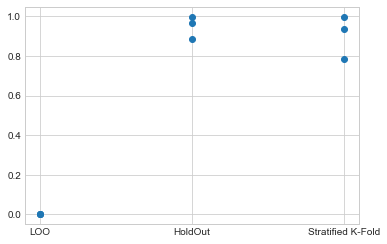

In [91]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','method','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = 0.4, random_state = 42,stratify=train_Y)
    holdout = compute_KNN_with_Classifier(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,scaler=StandardScaler())
    cv = LeaveOneGroupOut()
    splited = cv.split(trainX_data,train_Y.ravel(),groups=train_Y.ravel())
    loo = compute_KNN_with_Classifier(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),cross_validation = splited)  
    loo.append('LOO')
    loo.append(feature)
    results.append(loo)
    holdout.append('HoldOut')
    holdout.append(feature)
    results.append(holdout)
    skfold = compute_KNN_with_Classifier(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),cross_validation = selected_fold)
    skfold.append('Stratified K-Fold')
    skfold.append(feature)
    results.append(skfold)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.plot(statistics['method'],statistics['f1-score'],'o')
selected_method = "HoldOut"
print("Selected cross validation method: ",selected_method)

### Experiment - Best preprocessing technique
Experiment with the different preprocessing techniques

,mae,mse,rmse,precision,accuracy,f1-score,preprocessing,preprocessingFunc,type
5,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,MinMaxScaler,"MinMaxScaler(copy=True, feature_range=(0, 1))",BLE
6,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,MaxAbsScaler,MaxAbsScaler(copy=True),BLE
10,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,MaxAbsScaler,MaxAbsScaler(copy=True),Both
4,0.003333,0.003333,0.057735,0.995255,0.996667,0.996435,StandardScaler,"StandardScaler(copy=True, with_mean=True, with...",BLE
9,0.016667,0.016667,0.129099,0.985773,0.983333,0.981973,MinMaxScaler,"MinMaxScaler(copy=True, feature_range=(0, 1))",Both
8,0.030000,0.030000,0.173205,0.966946,0.970000,0.966608,StandardScaler,"StandardScaler(copy=True, with_mean=True, with...",Both
11,0.090000,0.090000,0.300000,0.895667,0.910000,0.905059,None,None,Both
1,0.096667,0.096667,0.310913,0.895357,0.903333,0.896365,MinMaxScaler,"MinMaxScaler(copy=True, feature_range=(0, 1))",WiFi
0,0.103333,0.103333,0.321455,0.886037,0.896667,0.886831,StandardScaler,"StandardScaler(copy=True, with_mean=True, with...",WiFi
3,0.133333,0.133333,0.365148,0.856289,0.866667,0.856179,None,None,WiFi


Selected Preprocessing:  MinMaxScaler


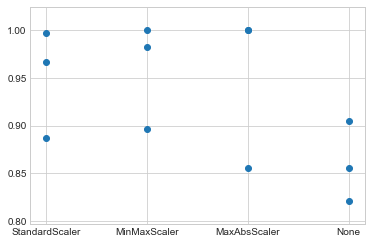

In [93]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','preprocessing','preprocessingFunc','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train  
    for preprocess in scaler:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(trainX_data,train_Y.ravel(),groups=train_Y.ravel())
            result = compute_KNN_with_Classifier(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=preprocess,cross_validation = splited)  
        elif selected_method =='Stratified K-Fold':
            result = compute_KNN_with_Classifier(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=preprocess,cross_validation = selected_fold)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = 0.4, random_state = 42,stratify=train_Y)
            result = compute_KNN_with_Classifier(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,scaler=preprocess)
        if(preprocess is None):
            regex = 'None'
        else:
            regex = re.search('(\w+)\(',str(preprocess)).group(1)
        result.append(regex)
        result.append(preprocess)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.scatter(statistics['preprocessing'],statistics['f1-score'])
selected_preprocessing = statistics.sort_values(by=['f1-score'],ascending=False)['preprocessing'].head(1).values[0]
selected_preprocesssing_func = statistics.sort_values(by=['f1-score'],ascending=False)['preprocessingFunc'].head(1).values[0]
print("Selected Preprocessing: ",selected_preprocessing)

### Experiment - Running the KNN function with the different weights

,mae,mse,rmse,precision,accuracy,f1-score,weights,type
3,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,distance,BLE
2,0.003333,0.003333,0.057735,0.995255,0.996667,0.996435,uniform,BLE
4,0.030000,0.030000,0.173205,0.966946,0.970000,0.966608,uniform,Both
5,0.040000,0.040000,0.200000,0.959487,0.960000,0.955611,distance,Both
1,0.080000,0.080000,0.282843,0.923023,0.920000,0.911402,distance,WiFi
0,0.103333,0.103333,0.321455,0.886037,0.896667,0.886831,uniform,WiFi


Selected weight:  distance


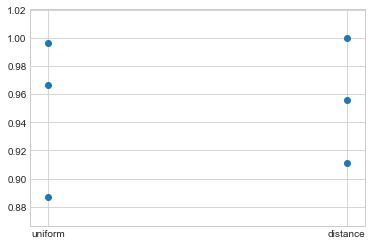

In [102]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','weights','type']
results = list()
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train  
    for weight in weights:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(X_train,train_Y.ravel(),groups=train_Y.ravel())
            result = compute_KNN_with_Classifier(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),cross_validation = splited,
                                               weights = weight)  
        elif selected_method =='Stratified K-Fold':
            result = compute_KNN_with_Classifier(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),cross_validation = selected_fold,
                                weights = weight)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = 0.4, random_state = 42,stratify=train_Y)
            result = compute_KNN_with_Classifier(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                                                 scaler=StandardScaler(),
                                               weights = weight)
        result.append(weight)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.scatter(statistics['weights'],statistics['f1-score'])
selected_weight = statistics.sort_values(by=['f1-score'],ascending=False)['weights'].head(1).values[0]
print("Selected weight: ",selected_weight)

### Experiment - Running the KNN function with the different algorithms

,mae,mse,rmse,precision,accuracy,f1-score,algorithm,type
4,0.003333,0.003333,0.057735,0.995255,0.996667,0.996435,brute,BLE
5,0.003333,0.003333,0.057735,0.995255,0.996667,0.996435,kd_tree,BLE
6,0.003333,0.003333,0.057735,0.995255,0.996667,0.996435,ball_tree,BLE
7,0.003333,0.003333,0.057735,0.995255,0.996667,0.996435,auto,BLE
8,0.030000,0.030000,0.173205,0.966946,0.970000,0.966608,brute,Both
9,0.030000,0.030000,0.173205,0.966946,0.970000,0.966608,kd_tree,Both
10,0.030000,0.030000,0.173205,0.966946,0.970000,0.966608,ball_tree,Both
11,0.030000,0.030000,0.173205,0.966946,0.970000,0.966608,auto,Both
0,0.100000,0.100000,0.316228,0.890616,0.900000,0.890247,brute,WiFi
2,0.100000,0.100000,0.316228,0.890616,0.900000,0.890247,ball_tree,WiFi


Selected algorithm:  brute


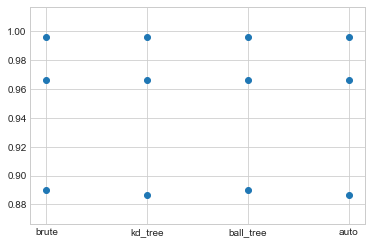

In [101]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','algorithm','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    for algorithm in algorithms:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(X_train,Y_train.ravel(),groups=Y_train.ravel())
            result = compute_KNN_with_Classifier(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),cross_validation = splited,
                                               algorithm= algorithm)  
        elif selected_method =='Stratified K-Fold':
            result = compute_KNN_with_Classifier(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),cross_validation = selected_fold,
                                algorithm= algorithm)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = 0.4, random_state = 42,stratify=train_Y)
            result = compute_KNN_with_Classifier(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                                                 scaler=StandardScaler(),
                                               algorithm= algorithm)
        result.append(algorithm)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.scatter(statistics['algorithm'],statistics['f1-score'])
selected_algorithm = statistics.sort_values(by=['f1-score'],ascending=False)['algorithm'].head(1).values[0]
print("Selected algorithm: ",selected_algorithm)

### Experiment - Running the KNN function with the different distance metrics

,mae,mse,rmse,precision,accuracy,f1-score,distance,type
5,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,manhattan,BLE
6,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,canberra,BLE
4,0.003333,0.003333,0.057735,0.995255,0.996667,0.996435,euclidean,BLE
7,0.003333,0.003333,0.057735,0.995255,0.996667,0.996435,braycurtis,BLE
11,0.003333,0.003333,0.057735,0.995255,0.996667,0.996435,braycurtis,Both
9,0.006667,0.006667,0.081650,0.992909,0.993333,0.992839,manhattan,Both
10,0.013333,0.013333,0.115470,0.983399,0.986667,0.985729,canberra,Both
8,0.030000,0.030000,0.173205,0.966946,0.970000,0.966608,euclidean,Both
2,0.053333,0.053333,0.230940,0.934780,0.946667,0.941576,canberra,WiFi
1,0.063333,0.063333,0.251661,0.929135,0.936667,0.932305,manhattan,WiFi


Selected distance:  manhattan


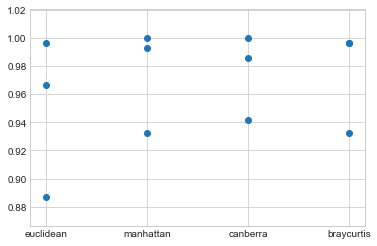

In [100]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','distance','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    for distance in distance_metris:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(X_train,train_Y.ravel,groups=train_Y.ravel())
            result = compute_KNN_with_Classifier(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),cross_validation = splited,
                                               metric = distance)  
        elif selected_method =='Stratified K-Fold':
            result = compute_KNN_with_Classifier(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),cross_validation = selected_fold,
                                metric = distance)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = 0.4, random_state = 42,stratify=train_Y)
            result = compute_KNN_with_Classifier(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                                                 scaler=StandardScaler(),
                                               metric = distance)
        result.append(distance)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.scatter(statistics['distance'],statistics['f1-score'])
selected_distance = statistics.sort_values(by=['f1-score'],ascending=False)['distance'].head(1).values[0]
print("Selected distance: ",selected_distance)

### Experiment - Tuning the K parameter

{'knn__n_neighbors': 3}
Max accuracy:  0.8133333333333334
{'knn__n_neighbors': 1}
Max accuracy:  0.9986666666666667
{'knn__n_neighbors': 5}
Max accuracy:  0.9466666666666667


,n_neighbhors,type
0,3,WiFi
1,1,BLE
2,5,Both


Text(0, 0.5, 'Cross-validated accuracy')

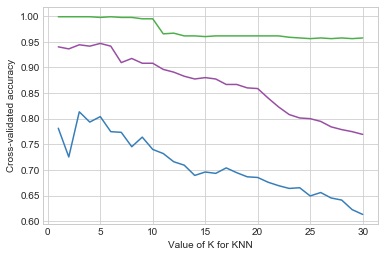

In [97]:
statistical_cols = ['n_neighbhors','type']
types = ['WiFi','BLE','Both']
results = list()
num = 0
palette = plt.get_cmap('Set1')
grid_results = list()
k_range = list(range(1, 31))
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    result = list()
    knn_classifier_estimator = KNeighborsClassifier() #init knn regressor estimator
    param_grid = {'knn__n_neighbors': k_range}
    # Create a pipeline
    pipe = Pipeline([('standardizer', StandardScaler()), ('knn', knn_classifier_estimator)])
    estimator = GridSearchCV(pipe, param_grid,cv=selected_fold)
    #fit model to data
    estimator.fit(trainX_data,train_Y.ravel())
    print(estimator.best_params_)
    grid_mean_scores = estimator.cv_results_['mean_test_score']
    print('Max accuracy: ', max(grid_mean_scores))
    grid_result = [grid_mean_scores]
    result.append(estimator.best_params_['knn__n_neighbors'])
    result.append(feature)
    results.append(result)
    grid_results.append(grid_result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics)
for grid in grid_results:
    num+=1
    plt.plot(k_range, grid[0],color=palette(num))
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

### Run RandomizedSearchCV for parameter tunning

In [98]:
types = ['WiFi','BLE','Both']
results = list()
num = 0
palette = plt.get_cmap('Set1')
grid_results = list()
k_range = list(range(1, 31))
tuned_parameters = {
    'knn__n_neighbors': k_range,
    'knn__metric':distance_metris,
    'knn__weights':weights
}
scores = ['f1_macro']
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
    for feature in types:
        #Decide on type of data
        if feature == 'WiFi':
            trainX_data = train_wifi
        elif feature == 'BLE':
            trainX_data = train_ble
        else:
            trainX_data = X_train 
        pipe = Pipeline([('standardizer', StandardScaler()), ('knn', KNeighborsClassifier())])
        clf = RandomizedSearchCV(pipe, tuned_parameters,n_iter=75,cv=selected_fold,scoring=score,verbose=1
        )
        clf.fit(trainX_data,train_Y.ravel())
        clf.best_params_['score'] = score
        clf.best_params_['best_score'] = clf.best_score_
        clf.best_params_['type'] = feature
        results.append(clf.best_params_)
gridcv_results = pd.DataFrame(results).sort_values(by=['best_score'],ascending=False)
display(gridcv_results)

# Tuning hyper-parameters for f1_macro

Fitting 6 folds for each of 75 candidates, totalling 450 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    6.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 6 folds for each of 75 candidates, totalling 450 fits


[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    3.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 6 folds for each of 75 candidates, totalling 450 fits


[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    7.3s finished


,knn__weights,knn__n_neighbors,knn__metric,score,best_score,type
1,distance,6,euclidean,f1_macro,0.998538,BLE
2,distance,5,manhattan,f1_macro,0.966956,Both
0,distance,3,manhattan,f1_macro,0.820685,WiFi


### Best Parameters
Display the best parameters tunned throughout the experiments

In [99]:
conclusion_cols=['K Parameter','Cross Validation','Weight','Preprocessing','Algorithm','Distance']
conclusion_list = [5,selected_method,selected_weight,selected_preprocessing,selected_algorithm,selected_distance]
conclusion_pd = pd.DataFrame([conclusion_list],columns= conclusion_cols)
display(conclusion_pd)

,K Parameter,Cross Validation,Weight,Preprocessing,Algorithm,Distance
0,5,HoldOut,uniform,MinMaxScaler,brute,euclidean


### Experiment - Filter Data
Experiment using filter approaches

In [103]:
def apply_filter():
    statistical_cols =  ['mae','mse','rmse','precision','accuracy','f1-score','filter']
    results = list()
    for filterelement in filters:
        if filterelement == 'Median':
            result = apply_median_filter()
        elif filterelement == 'Mean':
            result = apply_mean_filter()
        else:
            if selected_method == 'LOO':
                cv = LeaveOneGroupOut()
                splited = cv.split(X_train,train_Y.ravel,groups=train_Y.ravel())
                result = compute_KNN_with_Classifier(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),
                                                     cross_validation = splited)  
            elif selected_method =='Stratified K-Fold':
                result = compute_KNN_with_Classifier(testX_data=X_train,testY_data=train_Y.ravel(),scaler=StandardScaler(),
                                                     cross_validation = selected_fold)
            else:
                X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train,train_Y.ravel(), test_size = 0.6, random_state = 42,stratify=train_Y)
                result = compute_KNN_with_Classifier(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                                                     scaler=StandardScaler())
            result.append('No Filter')
        results.append(result)
    statistics = pd.DataFrame(columns=statistical_cols,data=results)
    display(statistics.sort_values(by=['mae']))
    plt.plot(statistics['filter'],statistics['mae'])
    selected_filter = statistics.sort_values(by=['mae'])['filter'].head(1).values[0]
    print("Selected Filter: ",selected_filter)
    return selected_filter
            

def apply_median_filter():
    medians = list()
    aps = ['zone']
    for col in X_train.columns: 
         aps.append(col)
    for rp, access_points in reference_points:
        zone = rp
        medians_list = [rp]
        for ap in X_train:
            median = access_points[ap].median()
            medians_list.append(median)
        medians.append(medians_list)
    median_pd = pd.DataFrame(medians,columns = aps)
    x_train = median_pd.iloc[:,1:]
    y_train = median_pd.iloc[:,0:1].values.flatten()
    nan_filler = x_train.min().min()*1.010
    x_train = x_train.fillna(nan_filler)
    if selected_method == 'LOO':
        cv = LeaveOneGroupOut()
        splited = cv.split(x_train,y_train,groups=y_train)
        result = compute_KNN_with_Classifier(flag=2,n_neighbors=1,testX_data=x_train,testY_data=y_train,scaler=StandardScaler(),
                                             cross_validation = splited)  
    elif selected_method =='Stratified K-Fold':
        result = compute_KNN_with_Classifier(flag=2,n_neighbors=1,testX_data=x_train,testY_data=y_train,scaler=StandardScaler(),
                                             cross_validation = selected_fold)
    else:
        X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(x_train,y_train, test_size = 0.6, random_state = 42)
        result = compute_KNN_with_Classifier(flag=2,n_neighbors=1,trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                                             scaler=StandardScaler())
    result.append('Median')
    return result

def apply_mean_filter(): 
    means = list()
    aps = ['zone']
    for col in X_train.columns: 
         aps.append(col)
    for rp, access_points in reference_points:
        zone = rp
        means_list = [zone]
        for ap in X_train:
            mean = access_points[ap].mean()
            means_list.append(mean)
        means.append(means_list)
    mean_pd = pd.DataFrame(means,columns = aps)
    x_train = mean_pd.iloc[:,1:]
    y_train = mean_pd.iloc[:,0:1].values.flatten()
    nan_filler = X_train.min().min()*1.010
    x_train = x_train.fillna(nan_filler)
    if selected_method == 'LOO':
        cv = LeaveOneGroupOut()
        splited = cv.split(x_train,y_train,groups=y_train)
        result = compute_KNN_with_Classifier(flag=2,n_neighbors=1,testX_data=x_train,testY_data=y_train,scaler=StandardScaler(),
                                             cross_validation = splited)  
    elif selected_method =='Stratified K-Fold':
        result = compute_KNN_with_Classifier(flag=2,n_neighbors=1,testX_data=x_train,testY_data=y_train,scaler=StandardScaler(),
                                             cross_validation = selected_fold)
    else:
        X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(x_train,y_train, test_size = 0.6, random_state = 42)
        result = compute_KNN_with_Classifier(flag=2,n_neighbors=1,trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                                             scaler=StandardScaler())
    result.append('Mean')
    return result

D:\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array(['Personal', 'Public'], dtype=object)

___


array(['Social', 'Social'], dtype=object)

D:\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array(['Personal', 'Public'], dtype=object)

___


array(['Social', 'Social'], dtype=object)

,mae,mse,rmse,precision,accuracy,f1-score,filter
2,0.035556,0.035556,0.188562,0.958933,0.964444,0.961149,No Filter
0,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,Median
1,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,Mean


Selected Filter:  No Filter


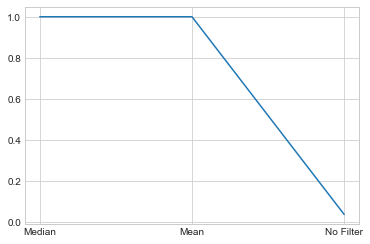

In [104]:
selected_filter = apply_filter()

### Best Results

Confusion Matrix:
[[ 40   0   5]
 [  0  41   4]
 [  2   1 132]]


,precision,recall,f1-score,support
0,0.952381,0.888889,0.919540,45.000000
1,0.976190,0.911111,0.942529,45.000000
2,0.936170,0.977778,0.956522,135.000000
accuracy,0.946667,0.946667,0.946667,0.946667
macro avg,0.954914,0.925926,0.939530,225.000000
weighted avg,0.947416,0.946667,0.946327,225.000000


,Actual,Predicted
0,2,2
1,2,2
2,0,0
3,2,2
4,2,2
...,...,...
220,1,1
221,1,1
222,1,2
223,2,2


Confusion Matrix:
[[ 45   0   0]
 [  0  45   0]
 [  0   0 135]]


,precision,recall,f1-score,support
0,1.0,1.0,1.0,45.0
1,1.0,1.0,1.0,45.0
2,1.0,1.0,1.0,135.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,225.0
weighted avg,1.0,1.0,1.0,225.0


,Actual,Predicted
0,2,2
1,2,2
2,0,0
3,2,2
4,2,2
...,...,...
220,1,1
221,1,1
222,1,1
223,2,2


Confusion Matrix:
[[ 45   0   0]
 [  0  44   1]
 [  0   1 134]]


,precision,recall,f1-score,support
0,1.000000,1.000000,1.000000,45.000000
1,0.977778,0.977778,0.977778,45.000000
2,0.992593,0.992593,0.992593,135.000000
accuracy,0.991111,0.991111,0.991111,0.991111
macro avg,0.990123,0.990123,0.990123,225.000000
weighted avg,0.991111,0.991111,0.991111,225.000000


,Actual,Predicted
0,2,2
1,2,2
2,0,0
3,2,2
4,2,2
...,...,...
220,1,1
221,1,1
222,1,1
223,2,2


,mae,mse,rmse,precision,accuracy,f1-score,type
1,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,BLE
2,0.008889,0.008889,0.094281,0.990453,0.991111,0.990453,Both
0,0.053333,0.053333,0.230940,0.952290,0.946667,0.941852,WiFi


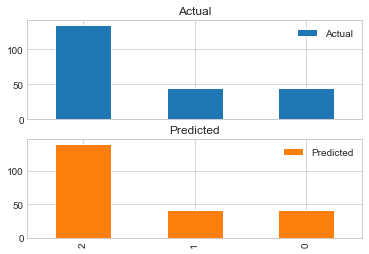

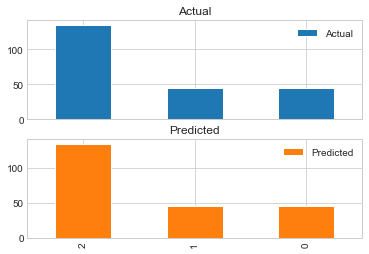

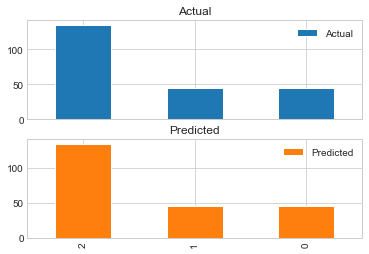

In [107]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','type']
results = list()
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    if selected_method == 'LOO':
        cv = LeaveOneGroupOut()
        splited = cv.split(trainX_data,train_Y.ravel(),groups=train_Y.ravel())
        result = compute_KNN_with_Classifier(flag=1,n_neighbors=5,testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),cross_validation = splited,
                            metric=selected_distance,
                             weights=selected_weight)  
    elif selected_method =='Stratified K-Fold':
        result = compute_KNN_with_Classifier(flag=1,n_neighbors=5,testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),
                                             cross_validation = selected_fold,
                            metric=selected_distance,
                             weights=selected_weight)  
    else:
        X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = 0.3, random_state = 42,stratify=train_Y)
        result = compute_KNN_with_Classifier(flag=1,n_neighbors=5,trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                             scaler=StandardScaler(),metric=selected_distance,
                             weights=selected_weight)  
    result.append(feature)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
final_results.append(statistics.sort_values(by=['f1-score'],ascending=False).head(1).values[0])